<a href="https://colab.research.google.com/github/yatharthsameer/AI-For-Economics/blob/main/Stock_Prediction_for_Google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Economics Term Project- Stock Market Analysis and Prediction using ML and DL



In this notebook, we use the Stock Prices Data of GOOGLE from the Yahoo Finance (Y Finance) library for predicting the future stock prices based on the stock data of past 5 years, 10 years and 15 years.

We use the following models for future price predictions:

(1) LSTM

(2) XGBoost

(3) FBProphet

# 1. Data Loading, Pre-Processing and Exploratory Data Analysis
We analyse the stock price data for past 1 year to understand different aspects of the data, such as seasonality or trends as well as to analyse correlation and other statistical aspects of the data, so as to better understand the data.

However, we train the ML and DL prediction models using past 5, 10 and 15 years of data respectively. The Exploratory Analysis was done for just last 1 year of data so that the plots are not cluttered.

In [1]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import copy
from datetime import datetime
import random

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
yf.pdr_override()

random.seed(0)


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
cur_date = datetime.now()
end = datetime(cur_date.year, cur_date.month, cur_date.day)
start1 = datetime(end.year-1, end.month , end.day)


for stock in tech_list:
    globals()[stock] = yf.download(stock, start1, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-29,144.289993,144.809998,140.350006,141.169998,140.385300,83763800,APPLE
2022-11-30,141.399994,148.720001,140.550003,148.029999,147.207184,111380900,APPLE
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485641,71250400,APPLE
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988419,65447400,APPLE
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400,APPLE
...,...,...,...,...,...,...,...
2023-11-21,143.910004,144.050003,141.500000,143.899994,143.899994,71226000,AMAZON
2023-11-22,144.570007,147.740005,144.570007,146.710007,146.710007,45669100,AMAZON
2023-11-24,146.699997,147.199997,145.320007,146.740005,146.740005,22378400,AMAZON


In [3]:
def _plot_series(series, series_name, coln_name='Open', series_index=0):

  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series[coln_name]

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

In [4]:
# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = df.sort_values('Date', ascending=True)
# print(df_sorted)

# for i, (series_name, series) in enumerate(df_sorted.groupby('company_name')):
#   print(series.head())
#   _plot_series(series, series_name, 'Open', i)
#   fig.legend(title='company_name', bbox_to_anchor=(1, 1), loc='upper left')

# sns.despine(fig=fig, ax=ax)
# plt.xlabel('Date')
# _ = plt.ylabel('Open')

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_10.sort_values('Date', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('company_name')):
#   _plot_series(series, series_name, 'High', i)
#   fig.legend(title='company_name', bbox_to_anchor=(1, 1), loc='upper left')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('Date')
# _ = plt.ylabel('High')

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_11.sort_values('Date', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('company_name')):
#   _plot_series(series, series_name, 'Low', i)
#   fig.legend(title='company_name', bbox_to_anchor=(1, 1), loc='upper left')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('Date')
# _ = plt.ylabel('Low')

# fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
# df_sorted = _df_12.sort_values('Date', ascending=True)
# for i, (series_name, series) in enumerate(df_sorted.groupby('company_name')):
#   _plot_series(series, series_name, 'Close', i)
#   fig.legend(title='company_name', bbox_to_anchor=(1, 1), loc='upper left')
# sns.despine(fig=fig, ax=ax)
# plt.xlabel('Date')
# _ = plt.ylabel('Close')

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

We can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records. Thus, we have only 255 records in one year because weekends are not included in the data.



In [5]:
# Summary Stats
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,115.282789,116.762789,114.154478,115.523606,115.523606,2.557438e+07
std,17.048502,17.060122,17.011556,17.022186,17.022186,1.066752e+07
min,86.720001,88.209999,85.570000,86.459999,86.459999,8.828600e+06
25%,99.250000,101.275002,98.105000,99.935001,99.935001,1.925575e+07
50%,120.320000,121.300003,119.209999,120.309998,120.309998,2.270580e+07
75%,130.730003,132.025002,129.704498,130.575005,130.575005,2.821805e+07
max,142.160004,142.380005,139.839996,141.699997,141.699997,9.779860e+07


## Information About the Data


In [6]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-11-28 to 2023-11-27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Plots of the Closing Prices

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

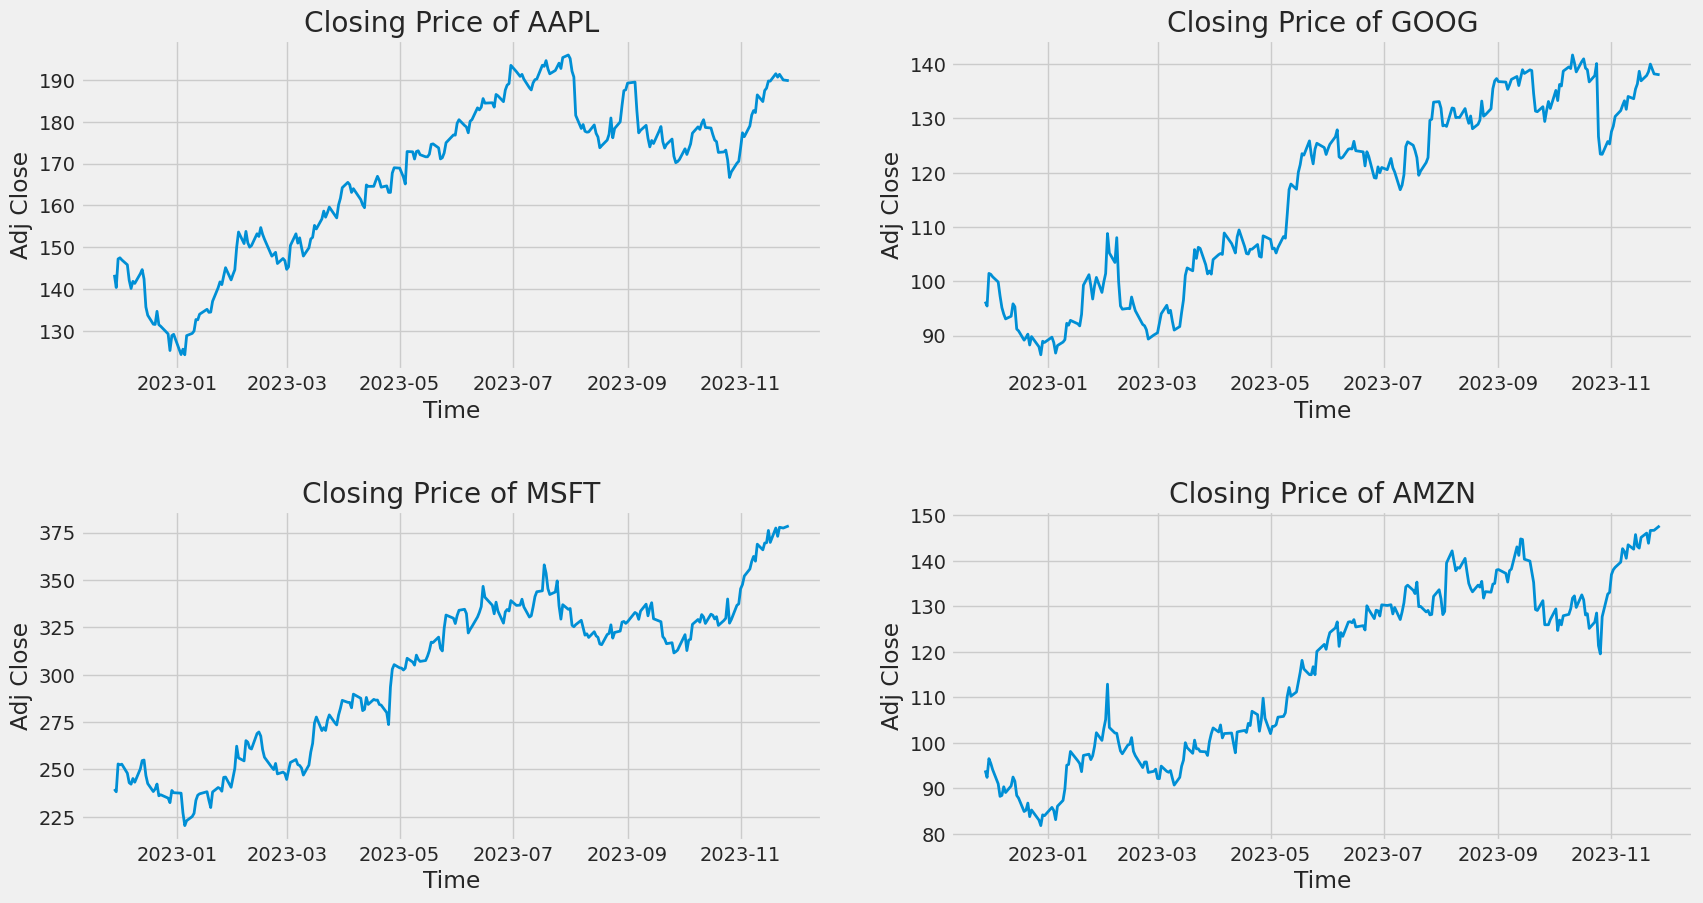

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    # company['Adj Close'].plot()
    plt.plot(company['Adj Close'], linewidth=2.0)
    plt.ylabel('Adj Close')
    plt.xlabel('Time')
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout(pad=3.0)

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

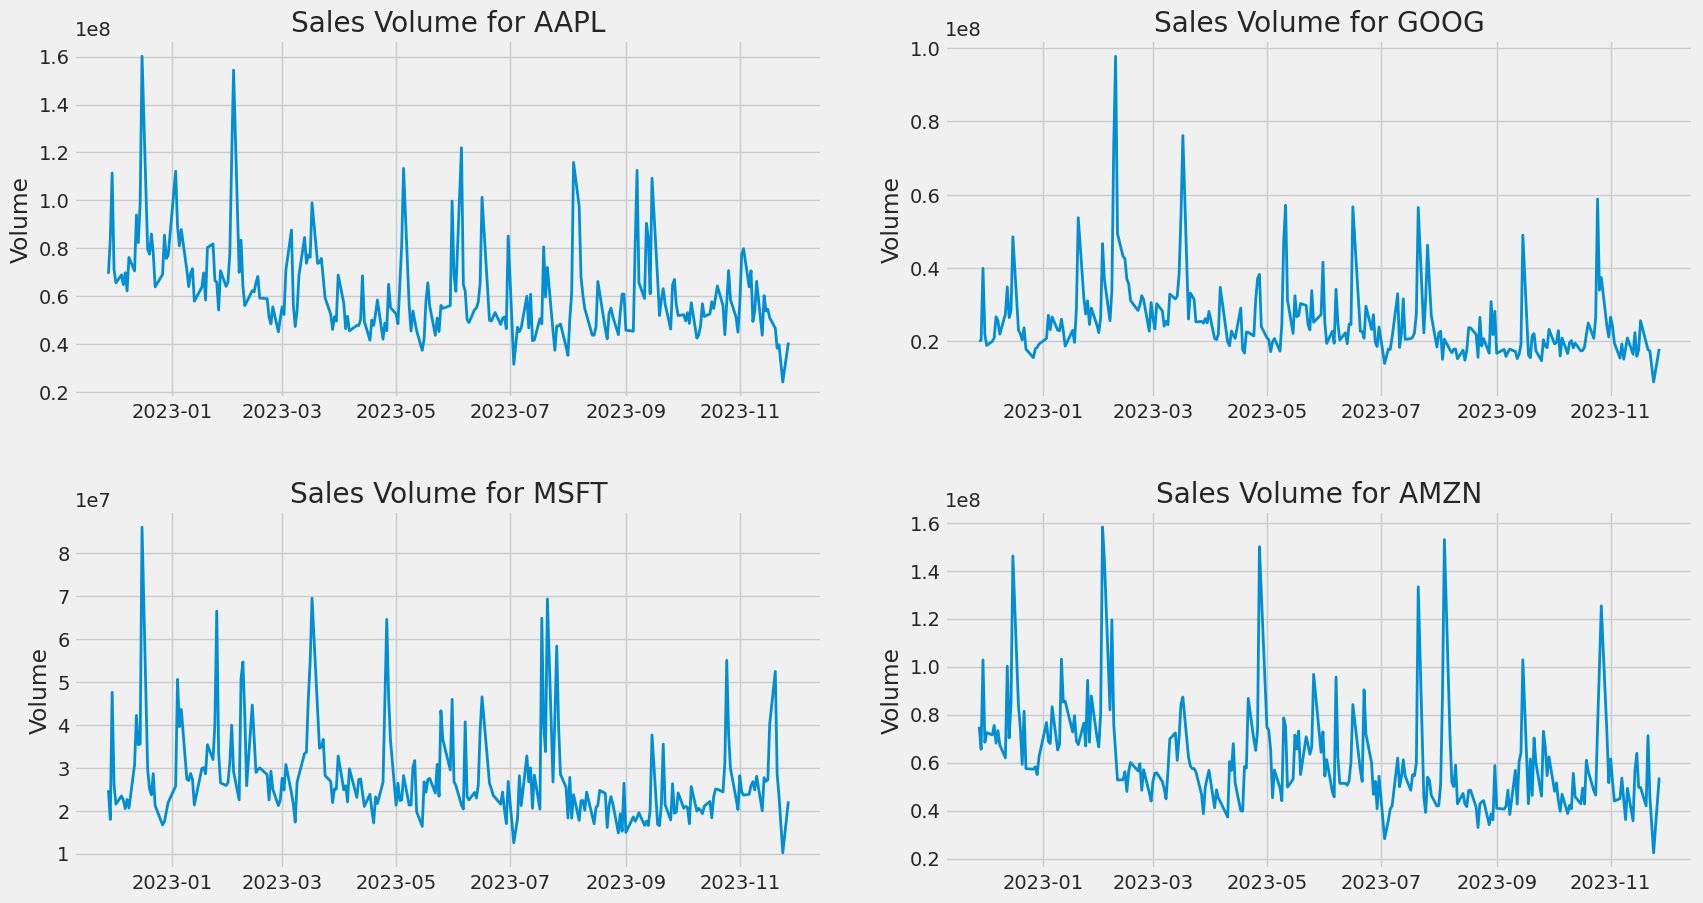

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(18, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    plt.plot(company['Volume'], linewidth=2.0)
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout(pad=3.0)

# for i, company in enumerate(company_list, 1):
#     plt.plot(company['Volume'], linewidth=2.0, label=tech_list[i - 1])

# plt.ylabel('Volume')
# plt.xlabel('Time')
# plt.title(f"Sales Volume of the 4 companies for the last 1 year")
# plt.tight_layout(pad=3.0)

## Moving Average of the Stock Prices of the Companies

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken for three different windows: 10-days, 20-days and 50-days period.

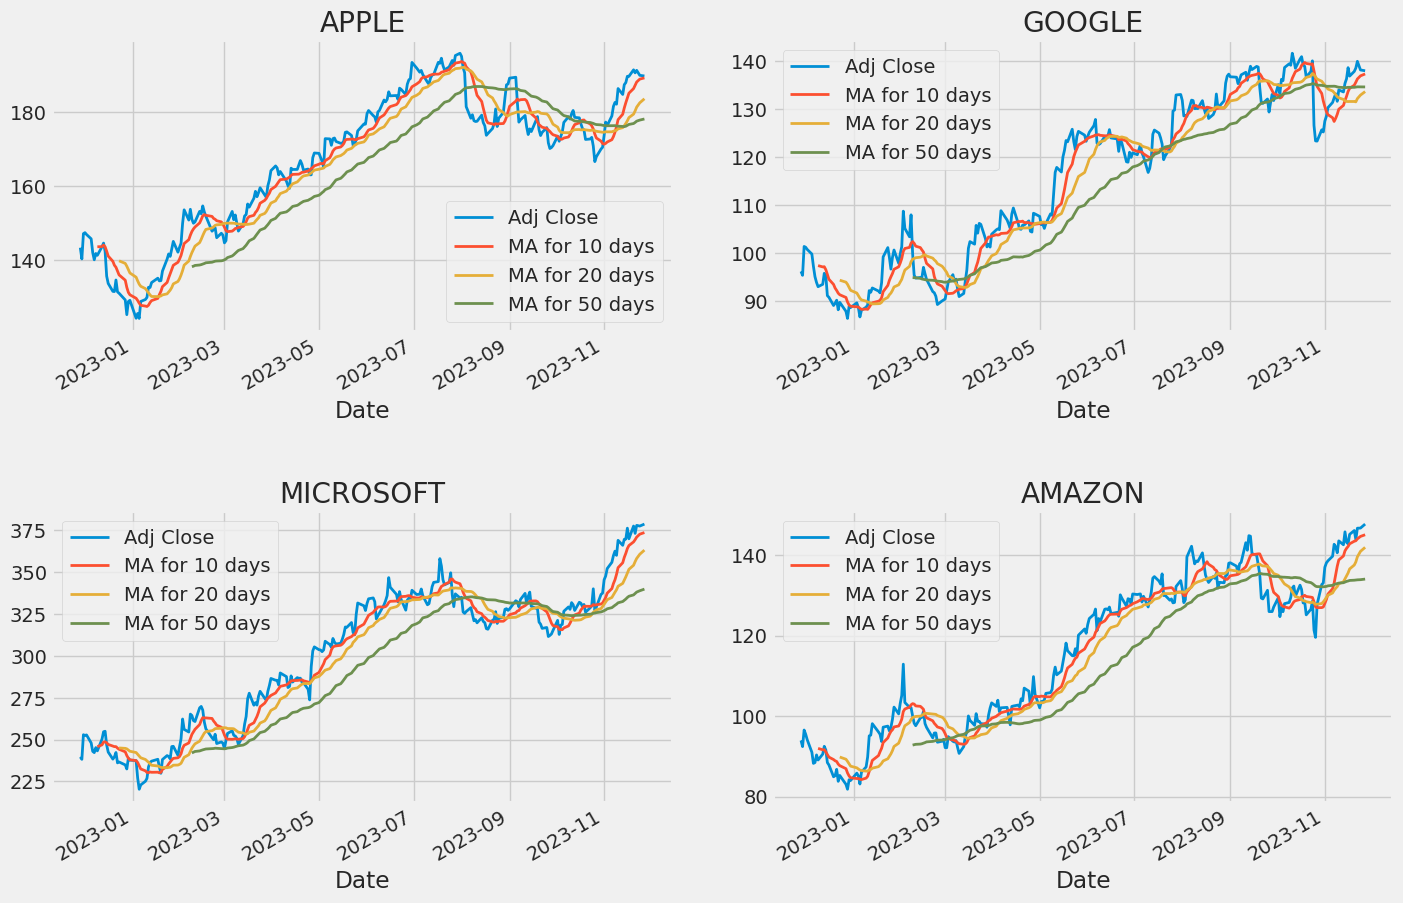

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0], linewidth=2.0)
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1], linewidth=2.0)
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0], linewidth=2.0)
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1], linewidth=2.0)
axes[1,1].set_title('AMAZON')

fig.tight_layout(pad=3.0)

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

## Daily Return of the Stock on Average

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

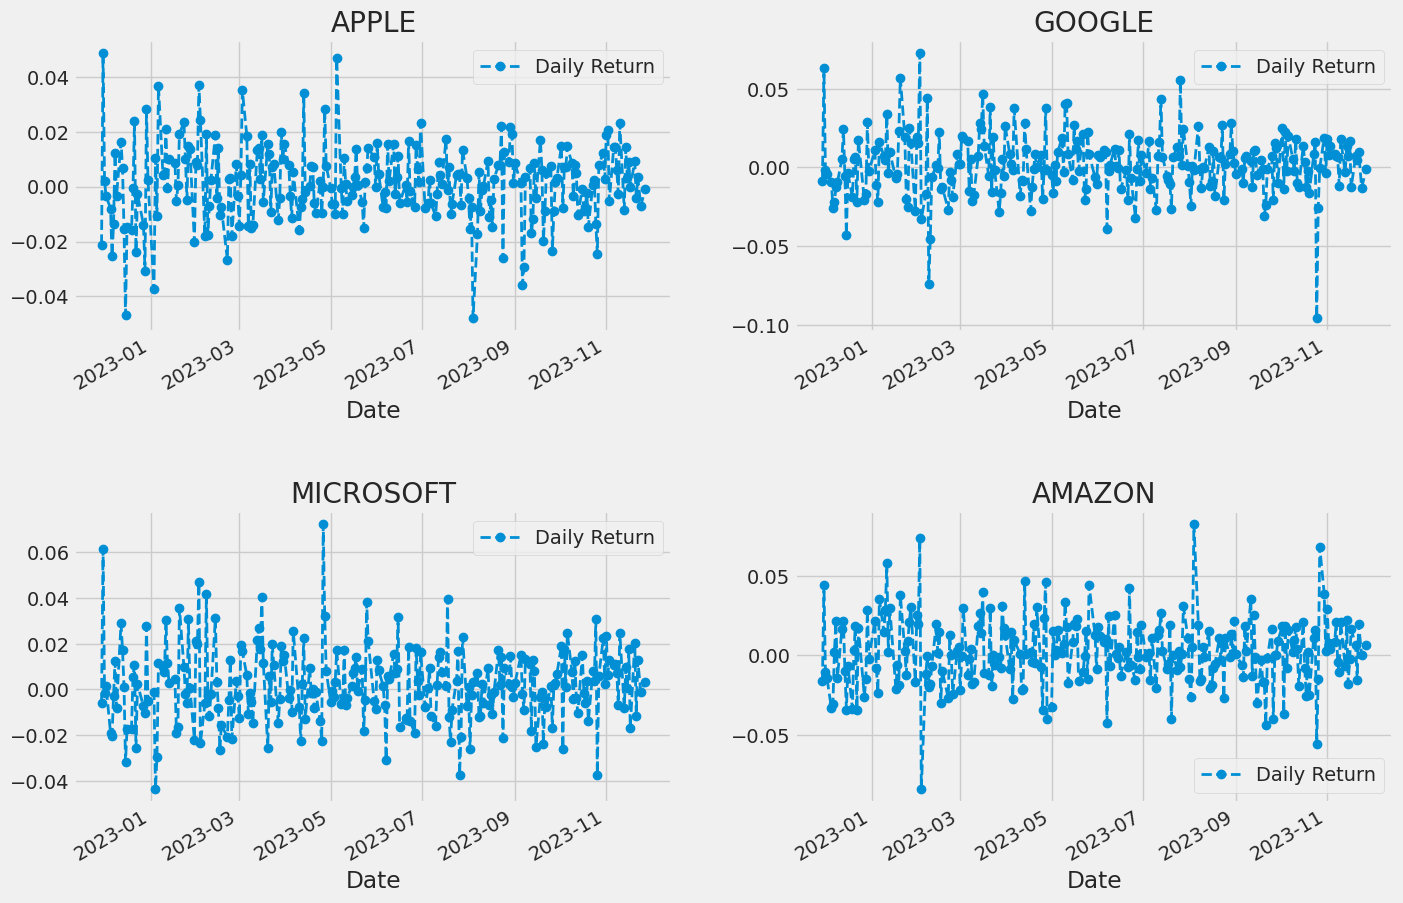

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', linewidth=2.0)
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', linewidth=2.0)
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', linewidth=2.0)
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', linewidth=2.0)
axes[1,1].set_title('AMAZON')

fig.tight_layout(pad=3.0)

## Average Daily Return Histogram

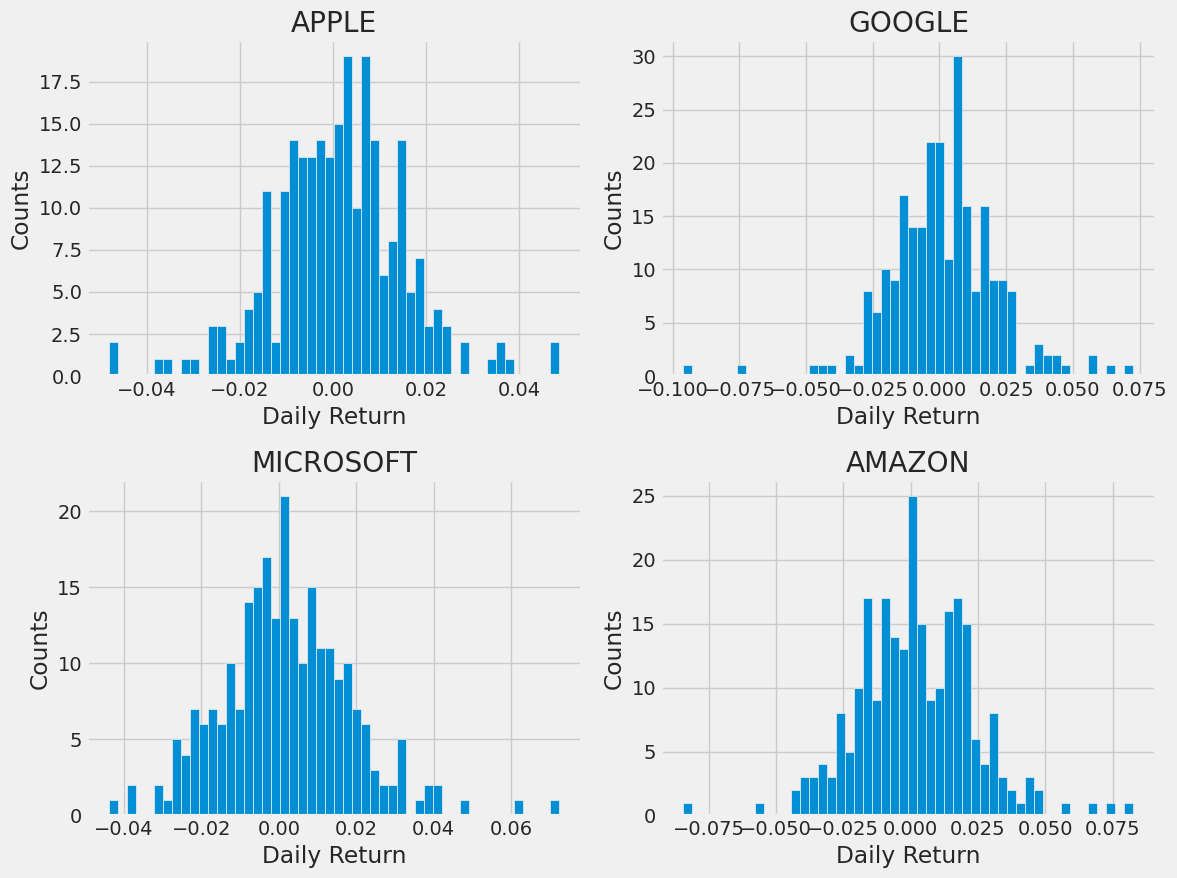

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 2. Analysis of Correlation between Stock Prices of the 4 companies

We analyse the correlation between the stock prices of the 4 companies (GOOGLE, AMAZON, MICROSOFT and APPLE) using both Autocorrelation (for within company correlation) and cross-correlation

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start1, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
print(tech_rets)
# tech_rets.head()

[*********************100%%**********************]  4 of 4 completed
                AAPL      AMZN      GOOG      MSFT
Date                                              
2022-11-28       NaN       NaN       NaN       NaN
2022-11-29 -0.021148 -0.016285 -0.008416 -0.005915
2022-11-30  0.048594  0.044579  0.062971  0.061624
2022-12-01  0.001892 -0.010773 -0.001676 -0.001764
2022-12-02 -0.003371 -0.014346 -0.004443  0.001296
...              ...       ...       ...       ...
2023-11-20  0.009278  0.006544  0.007156  0.020522
2023-11-21 -0.004231 -0.015260  0.005075 -0.011578
2023-11-22  0.003514  0.019528  0.010100  0.012813
2023-11-24 -0.007004  0.000204 -0.012855 -0.001112
2023-11-27 -0.000948  0.006747 -0.001230  0.003126

[251 rows x 4 columns]


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

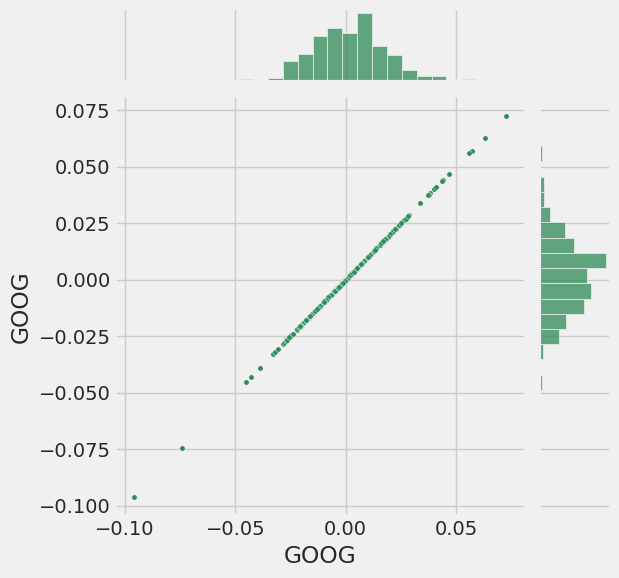

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen', s=15)

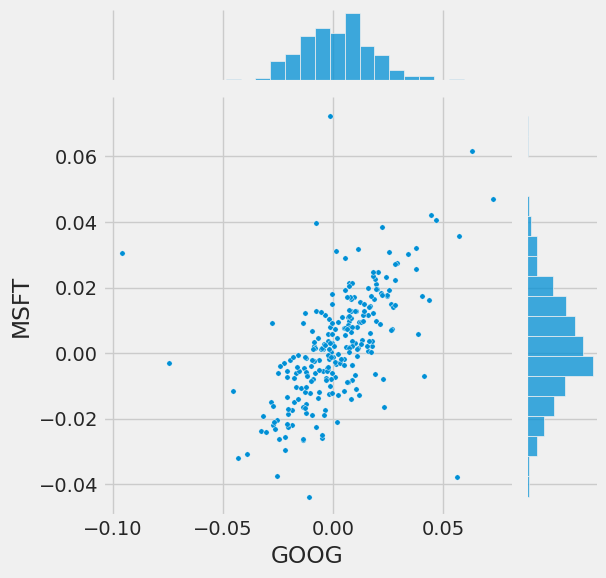

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', s=15)

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.


## Linear Regression Fit for Pairwise Stock Daily % Change Values across all comapny pairs

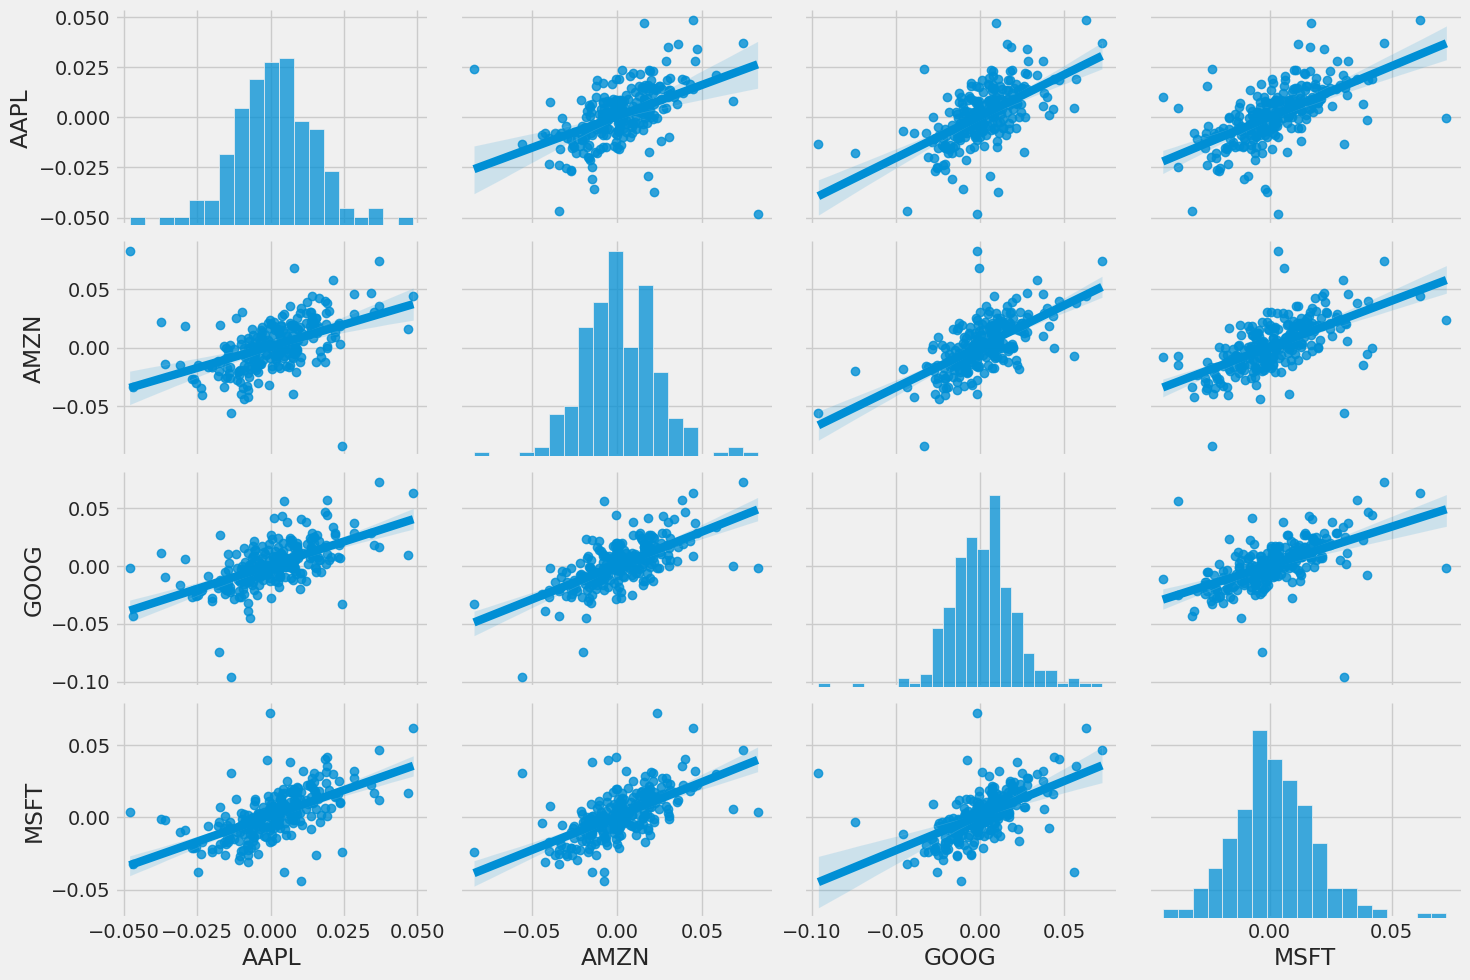

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg', aspect=1.5)

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.


## Comparison Plots of Daily Percentage Change in Closing Prices for all Company Pairs

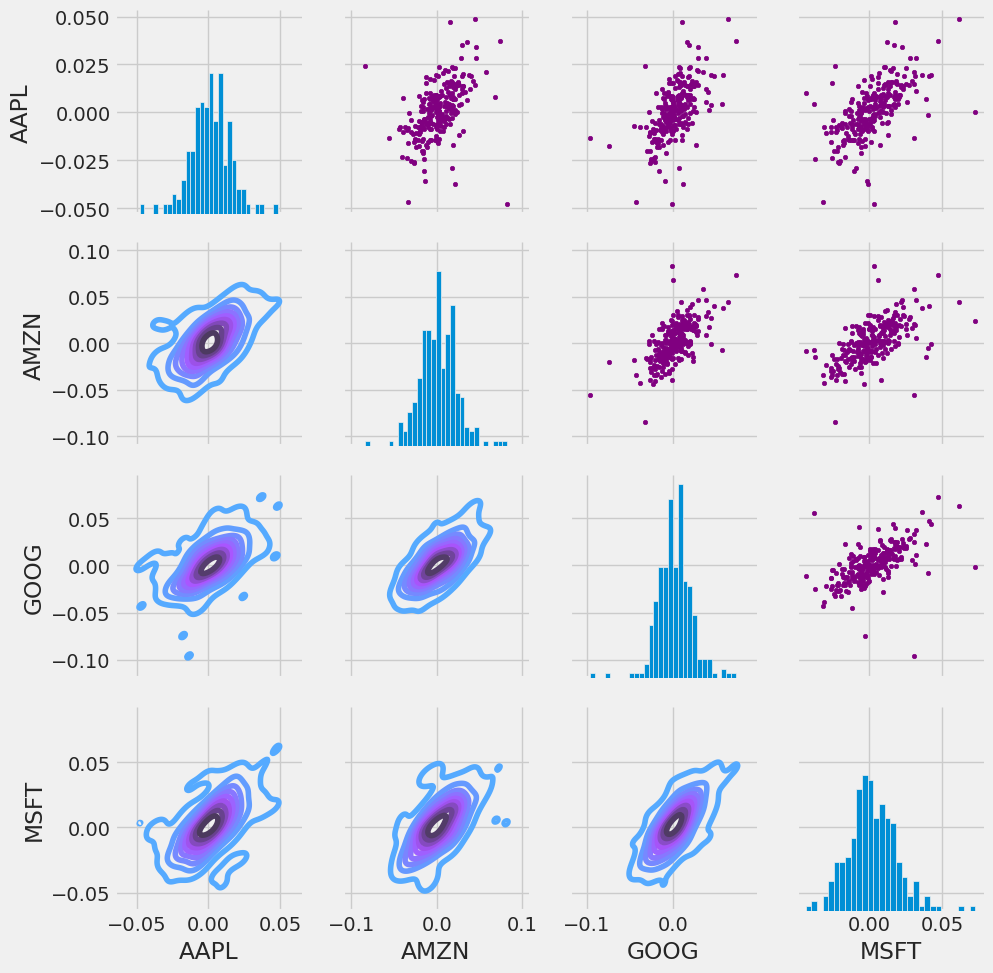

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple', s=10)

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

## Comparison Plots of Closing Prices for all Company Pairs

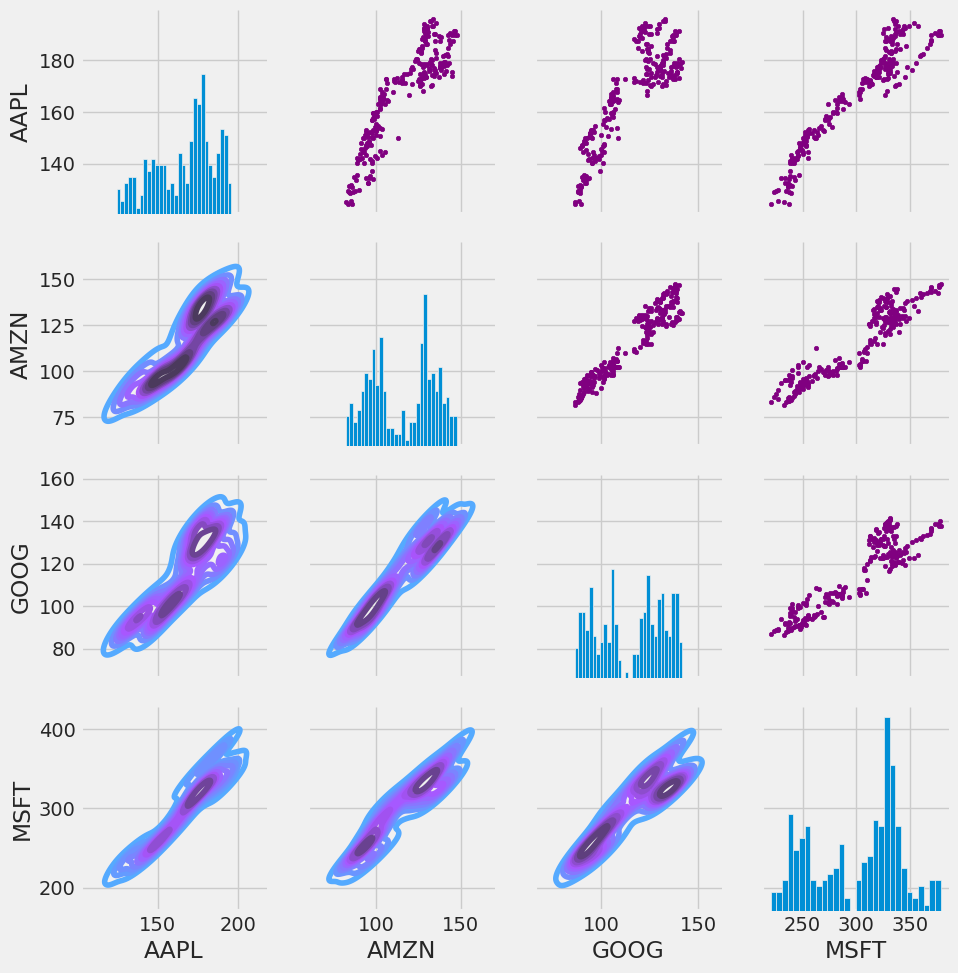

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple', s=10)

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

## Correlation Analysis Grid for all possible company pairs

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

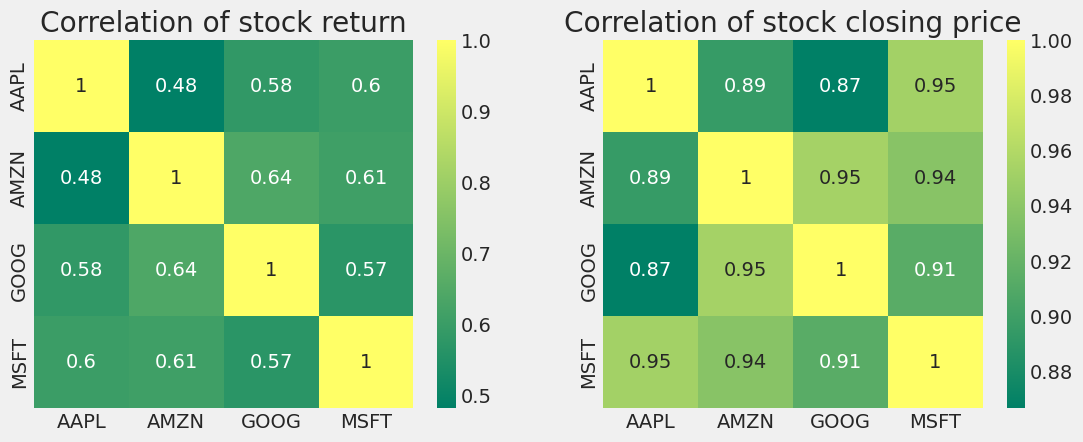

In [18]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

## Comparison of Risk Analysis of Investments in the 4 companies based on Mean and Variance

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

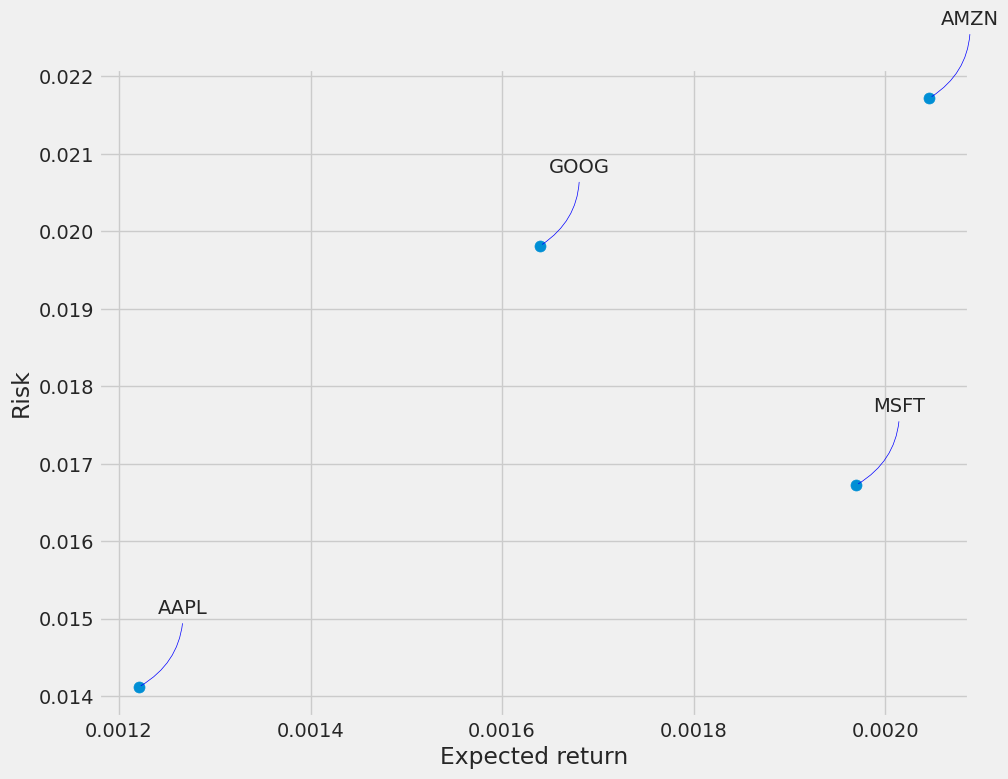

In [19]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 3. Closing Stock Price Prediction for GOOGLE for the last 30 days (of Oct-Nov, 2023) based on LSTM models



1.  Model1 : Trained on last 5 years of Google's stock data
2.  Model2 : Trained on last 10 years of Google's stock data
3. Model3: Trained on last 10 years of Google's stock data

In [20]:
# Get the stock quote
end = datetime.now()
end = datetime(end.year, end.month-1 , end.day)
df5 = pdr.get_data_yahoo('GOOG', start=datetime(end.year-5, end.month , end.day), end=end)
df10 = pdr.get_data_yahoo('GOOG', start=datetime(end.year-10, end.month , end.day), end=end)
df15 = pdr.get_data_yahoo('GOOG', start=datetime(end.year-15, end.month , end.day), end=end)
# Show the data
df5

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-29,54.123501,54.852001,49.791500,51.004002,51.004002,77614000
2018-10-30,50.423000,51.874500,50.037498,51.810501,51.810501,64254000
2018-10-31,52.990501,54.597000,52.849998,53.838501,53.838501,50596000
2018-11-01,53.790001,54.198750,53.123001,53.500000,53.500000,29640000
2018-11-02,53.686501,54.148750,52.730499,52.889500,52.889500,36780000
...,...,...,...,...,...,...
2023-10-23,136.229996,139.020004,135.110001,137.899994,137.899994,20780700
2023-10-24,139.160004,140.710007,138.750000,140.119995,140.119995,26535200
2023-10-25,129.770004,130.100006,126.089996,126.669998,126.669998,58796100


## Plot of Closing Price History over the last 15 years for GOOGLE's stocks

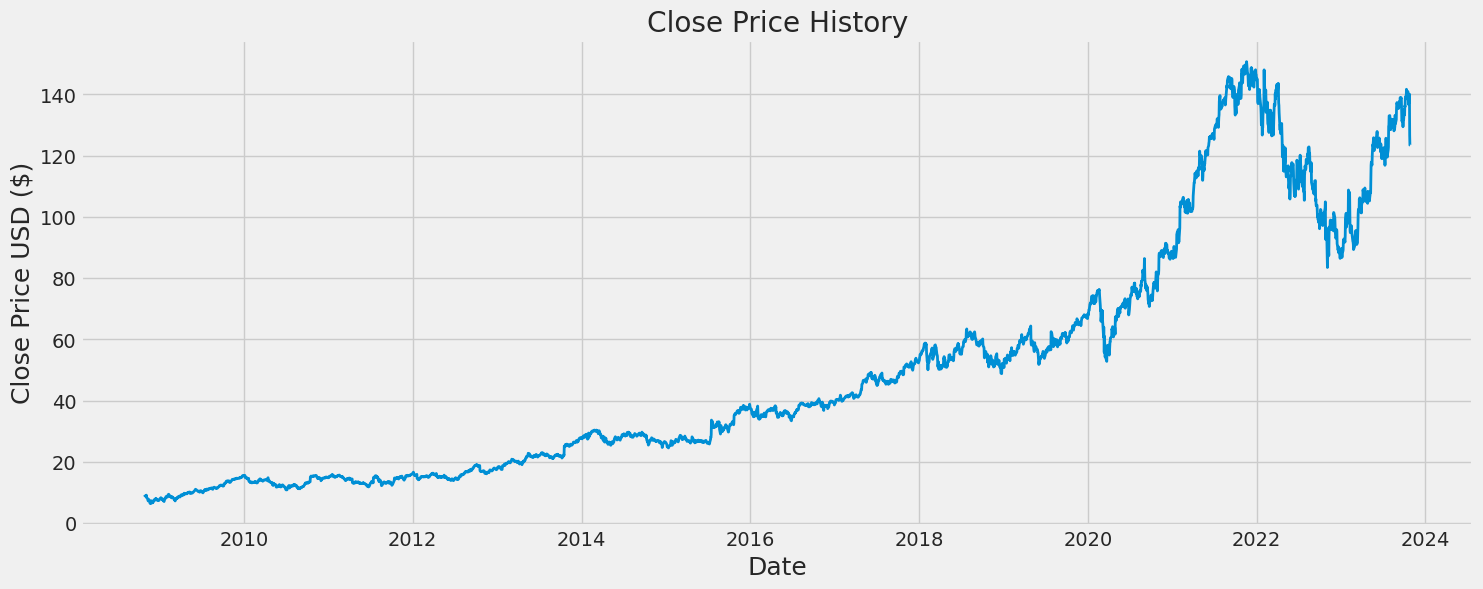

In [21]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df15['Close'], linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# 4. Training of LSTM Models




## Data Preprocessing for Training



In [22]:
# Create a new dataframe with only the 'Close column
data5 = df5.filter(['Close'])
data10 = df10.filter(['Close'])
data15 = df15.filter(['Close'])

# Convert the dataframe to a numpy array
dataset5 = data5.values
dataset10 = data10.values
dataset15 = data15.values
# Get the number of rows to train the model on
training_data_len5 = int(np.ceil( len(dataset5) * .95 ))
training_data_len10 = int(np.ceil( len(dataset10) * .95 ))
training_data_len15 = int(np.ceil( len(dataset15) * .95 ))


print("Length of training data of 5 years: ", training_data_len5)
print("Length of training data of 10 years: ", training_data_len10)
print("Length of training data of 15 years: ", training_data_len15)

Length of training data of 5 years:  1196
Length of training data of 10 years:  2393
Length of training data of 15 years:  3588


In [23]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data5 = scaler.fit_transform(dataset5)
scaled_data10 = scaler.fit_transform(dataset10)
scaled_data15 = scaler.fit_transform(dataset15)

scaled_data5

array([[0.02152153],
       [0.0294363 ],
       [0.04933856],
       ...,
       [0.7640876 ],
       [0.73238928],
       [0.73199672]])

In [24]:
# Create the training data set
# Create the scaled training data set
train_data5 = scaled_data5[0:int(training_data_len5), :]
train_data10 = scaled_data10[0:int(training_data_len10), :]
train_data15 = scaled_data15[0:int(training_data_len15), :]

# Split the data into x_train and y_train data sets
x_train5 = []
y_train5 = []
x_train10 = []
y_train10 = []
x_train15 = []
y_train15 = []

for i in range(60, len(train_data5)):
    x_train5.append(train_data5[i-60:i, 0])
    y_train5.append(train_data5[i, 0])
    if i<= 61:
        print(x_train5)
        print(y_train5)
        print()

for i in range(60, len(train_data10)):
    x_train10.append(train_data10[i-60:i, 0])
    y_train10.append(train_data10[i, 0])

for i in range(60, len(train_data15)):
    x_train15.append(train_data15[i-60:i, 0])
    y_train15.append(train_data15[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train10, y_train10 = np.array(x_train10), np.array(y_train10)
x_train15, y_train15 = np.array(x_train15), np.array(y_train15)


# Reshape the data
x_train5 = np.reshape(x_train5, (x_train5.shape[0], x_train5.shape[1], 1))
x_train10 = np.reshape(x_train10, (x_train10.shape[0], x_train10.shape[1], 1))
x_train15 = np.reshape(x_train15, (x_train15.shape[0], x_train15.shape[1], 1))

# x_train.shape

[array([0.02152153, 0.0294363 , 0.04933856, 0.0460166 , 0.04002531,
       0.03134017, 0.03905376, 0.05749375, 0.0521011 , 0.04412744,
       0.03062375, 0.0293578 , 0.03309189, 0.04342087, 0.04184086,
       0.02148226, 0.0243086 , 0.03012326, 0.02338613, 0.03552571,
       0.03345993, 0.05398045, 0.05499617, 0.05800408, 0.06389231,
       0.03660523, 0.04539343, 0.02961783, 0.03107519, 0.03706158,
       0.04291544, 0.04204205, 0.03232643, 0.01977958, 0.02575615,
       0.02295924, 0.0162859 , 0.00162908, 0.        , 0.03103102,
       0.03319986, 0.02986319, 0.02914186, 0.03416651, 0.01954897,
       0.04636498, 0.04522658, 0.0490981 , 0.04830321, 0.04617851,
       0.03973091, 0.03359732, 0.04952499, 0.05139943, 0.05578125,
       0.05988339, 0.04627176, 0.04874972, 0.04793027, 0.05631611])]
[0.04605586810606743]

[array([0.02152153, 0.0294363 , 0.04933856, 0.0460166 , 0.04002531,
       0.03134017, 0.03905376, 0.05749375, 0.0521011 , 0.04412744,
       0.03062375, 0.0293578 , 0.03

## Initialization of the LSTM models

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Model1: 5 years of data
model1 = Sequential()
model1.add(LSTM(128, return_sequences=True, input_shape= (x_train5.shape[1], 1)))
model1.add(LSTM(64, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))
model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Model2: 10 years of data
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True, input_shape= (x_train10.shape[1], 1)))
model2.add(LSTM(64, return_sequences=False))
model2.add(Dense(25))
model2.add(Dense(1))
model2.summary()

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Model3: 15 years of data
model3 = Sequential()
model3.add(LSTM(128, return_sequences=True, input_shape= (x_train5.shape[1], 1)))
model3.add(LSTM(64, return_sequences=False))
model3.add(Dense(25))
model3.add(Dense(1))
model3.summary()

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param

### Train the model1 (training on past 5 years of data)

In [26]:
# Train the model
history5 = model1.fit(x_train5, y_train5, batch_size=10, epochs=20)



Epoch 1/20
114/114 [==============================] - 10s 8ms/step - loss: 0.0065
Epoch 2/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 3/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0014
Epoch 4/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 5/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 6/20
114/114 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 7/20
114/114 [==============================] - 1s 8ms/step - loss: 9.0830e-04
Epoch 8/20
114/114 [==============================] - 1s 10ms/step - loss: 9.7707e-04
Epoch 9/20
114/114 [==============================] - 1s 11ms/step - loss: 8.7890e-04
Epoch 10/20
114/114 [==============================] - 1s 11ms/step - loss: 8.0249e-04
Epoch 11/20
114/114 [==============================] - 1s 8ms/step - loss: 7.1151e-04
Epoch 12/20
114/114 [==============================] - 1s 8ms/step - loss: 6.5362e-

### Loss Plot

[0.0064954254776239395, 0.0014146835310384631, 0.001351621001958847, 0.001300704199820757, 0.0012818427057936788, 0.0011745287338271737, 0.0009082969045266509, 0.0009770669275894761, 0.0008788989507593215, 0.0008024908020161092, 0.0007115067564882338, 0.0006536226719617844, 0.0005790632567368448, 0.0005087632453069091, 0.0005616989219561219, 0.0005482683191075921, 0.0004970143781974912, 0.00045908536412753165, 0.0004491764702834189, 0.00045795791083946824]


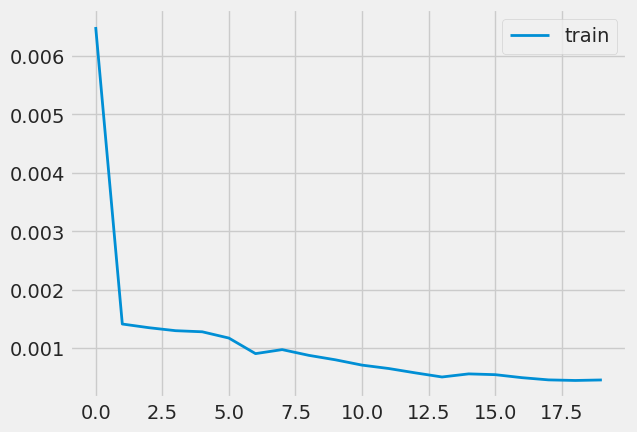

In [27]:
# Loss Plot
print(history5.history['loss'])
plt.plot(history5.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model1

In [28]:
# Create the testing data set

test_data5 = scaled_data5[training_data_len5 - 60: , :]
# Create the data sets x_test and y_test
x_test5 = []
y_test5 = dataset5[training_data_len5:, :]
for i in range(60, len(test_data5)):
    x_test5.append(test_data5[i-60:i, 0])

# Convert the data to a numpy array
x_test5 = np.array(x_test5)

# Reshape the data
x_test5 = np.reshape(x_test5, (x_test5.shape[0], x_test5.shape[1], 1 ))

# Get the models predicted price values
predictions = model1.predict(x_test5)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test5) ** 2)))
rmse

2/2 [==============================] - 1s 8ms/step


6.245243587286137

### Plot comparing the Actual Stock Closing Prices and Model1's Predictions on Test Set

<ipython-input-29-473f8b691788>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


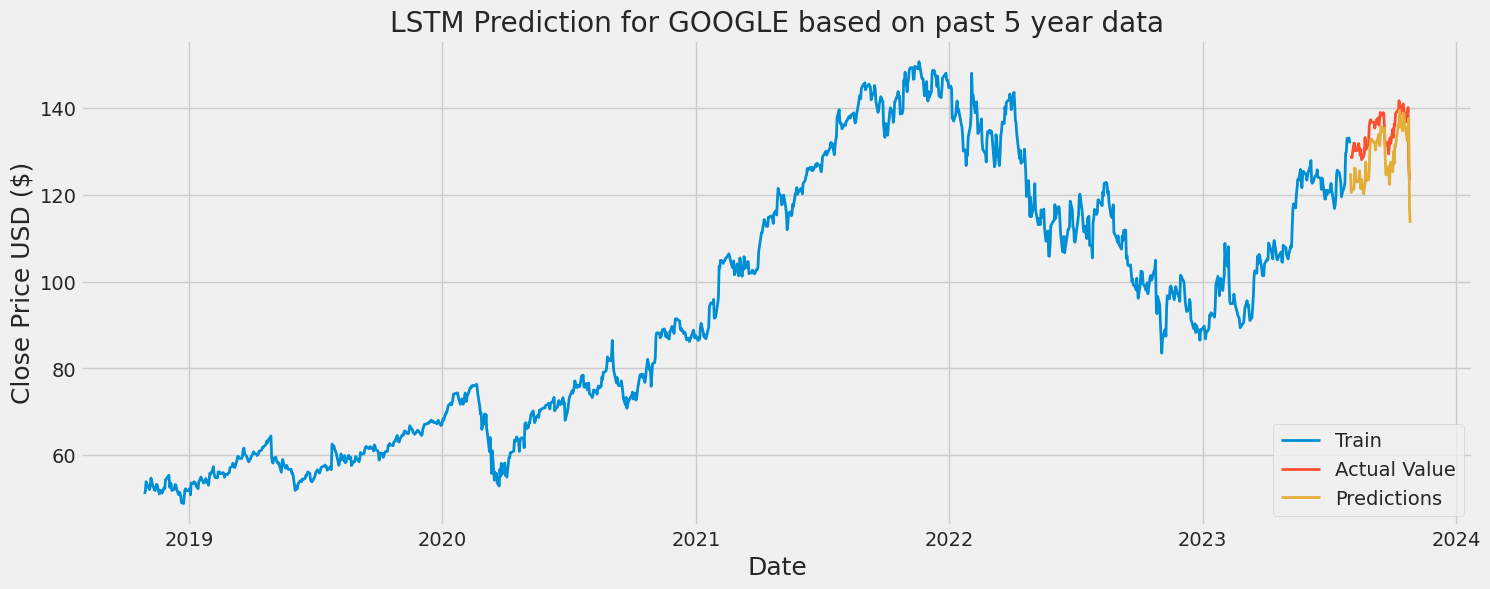

In [29]:
# Plot the data
train = data5[:training_data_len5]
valid = data5[training_data_len5:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for GOOGLE based on past 5 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the model2 (training on past 10 years of data)

In [30]:

# train for last 10 years
history10 = model2.fit(x_train10, y_train10, batch_size=10, epochs=20)

Epoch 1/20
234/234 [==============================] - 6s 8ms/step - loss: 0.0059
Epoch 2/20
234/234 [==============================] - 2s 8ms/step - loss: 6.0858e-04
Epoch 3/20
234/234 [==============================] - 2s 8ms/step - loss: 6.1656e-04
Epoch 4/20
234/234 [==============================] - 2s 8ms/step - loss: 4.8113e-04
Epoch 5/20
234/234 [==============================] - 2s 8ms/step - loss: 4.4802e-04
Epoch 6/20
234/234 [==============================] - 2s 11ms/step - loss: 4.5075e-04
Epoch 7/20
234/234 [==============================] - 2s 9ms/step - loss: 4.5242e-04
Epoch 8/20
234/234 [==============================] - 2s 8ms/step - loss: 3.9808e-04
Epoch 9/20
234/234 [==============================] - 2s 8ms/step - loss: 3.3321e-04
Epoch 10/20
234/234 [==============================] - 2s 8ms/step - loss: 3.5208e-04
Epoch 11/20
234/234 [==============================] - 2s 8ms/step - loss: 3.2775e-04
Epoch 12/20
234/234 [==============================] - 2s 8ms/step

### Loss Plot

[0.005858521908521652, 0.0006085823406465352, 0.0006165605736896396, 0.0004811334074474871, 0.00044802448246628046, 0.00045074764057062566, 0.00045242198393680155, 0.00039807811845093966, 0.00033321380033157766, 0.0003520770405884832, 0.0003277525829616934, 0.00037475250428542495, 0.000271362456260249, 0.00024230741837527603, 0.00028228931478224695, 0.00023537117522209883, 0.00022251211339607835, 0.0002004410489462316, 0.00018210813868790865, 0.00020239125296939164]


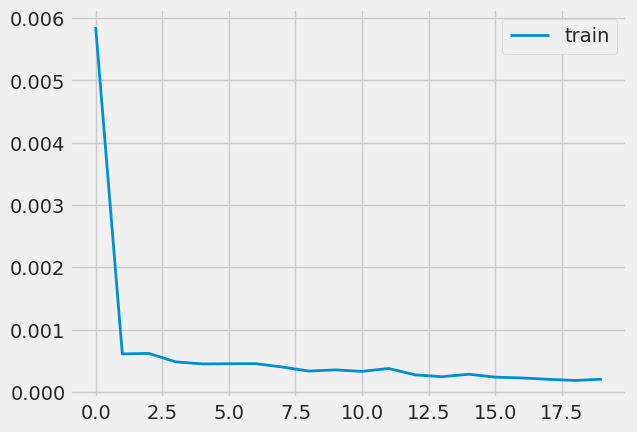

In [31]:
print(history10.history['loss'])

plt.plot(history10.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model2

In [32]:
# Create the testing data set
test_data10 = scaled_data10[training_data_len10 - 60: , :]
# Create the data sets x_test and y_test
x_test10 = []
y_test10 = dataset10[training_data_len10:, :]
for i in range(60, len(test_data10)):
    x_test10.append(test_data10[i-60:i, 0])

# Convert the data to a numpy array
x_test10 = np.array(x_test10)

# Reshape the data
x_test10 = np.reshape(x_test10, (x_test10.shape[0], x_test10.shape[1], 1 ))

# Get the models predicted price values
predictions = model2.predict(x_test10)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test10) ** 2)))
rmse

4/4 [==============================] - 1s 6ms/step


5.551653551982567

### Plot comparing the Actual Stock Closing Prices and Model2's Predictions on Test Set

<ipython-input-33-4097395e33b2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


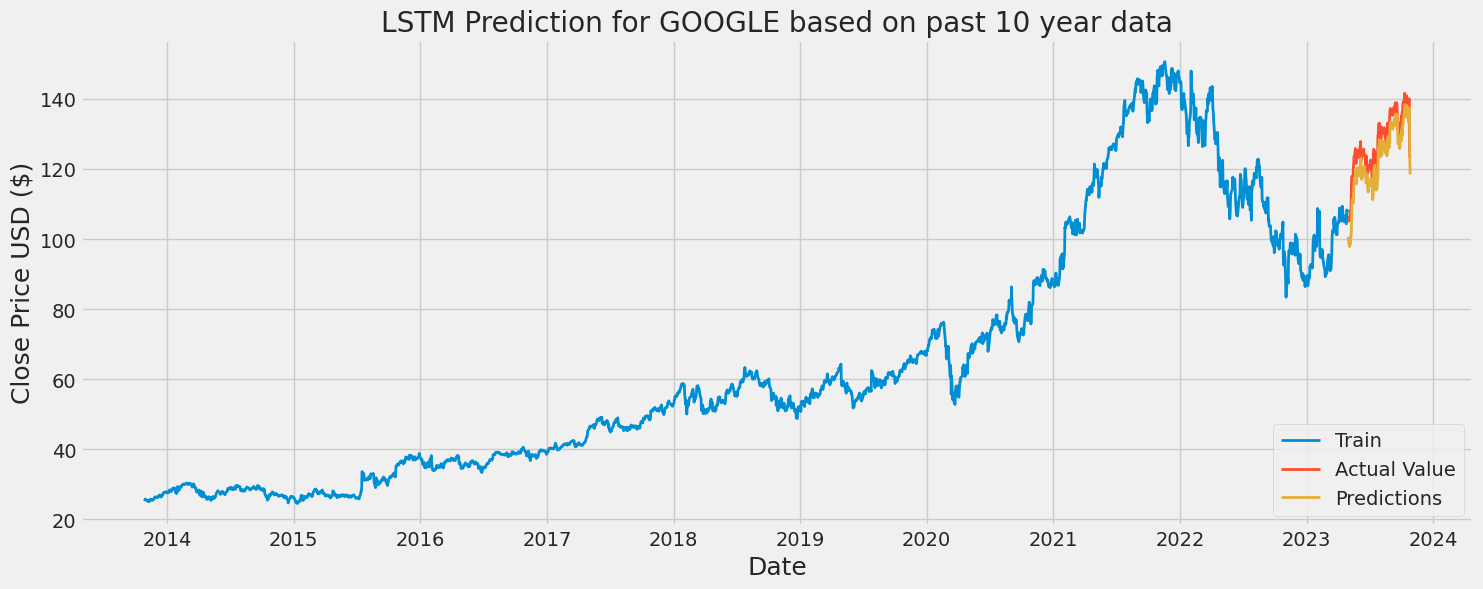

In [33]:
# Plot the data
train = data10[:training_data_len10]
valid = data10[training_data_len10:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for GOOGLE based on past 10 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the model3 (training on past 15 years of data)

In [34]:
# train for last 15 years
history15 = model3.fit(x_train15, y_train15, batch_size=15, epochs=20)

Epoch 1/20
236/236 [==============================] - 5s 8ms/step - loss: 0.0025
Epoch 2/20
236/236 [==============================] - 2s 10ms/step - loss: 3.1602e-04
Epoch 3/20
236/236 [==============================] - 2s 10ms/step - loss: 3.1822e-04
Epoch 4/20
236/236 [==============================] - 2s 9ms/step - loss: 3.0640e-04
Epoch 5/20
236/236 [==============================] - 2s 8ms/step - loss: 2.7895e-04
Epoch 6/20
236/236 [==============================] - 2s 8ms/step - loss: 2.0629e-04
Epoch 7/20
236/236 [==============================] - 2s 8ms/step - loss: 2.1344e-04
Epoch 8/20
236/236 [==============================] - 2s 8ms/step - loss: 2.0442e-04
Epoch 9/20
236/236 [==============================] - 2s 8ms/step - loss: 1.8213e-04
Epoch 10/20
236/236 [==============================] - 3s 11ms/step - loss: 1.3839e-04
Epoch 11/20
236/236 [==============================] - 2s 9ms/step - loss: 1.5225e-04
Epoch 12/20
236/236 [==============================] - 2s 8ms/st

### Loss Plot

[0.002542332513257861, 0.0003160220221616328, 0.00031822232995182276, 0.00030639974283985794, 0.00027894857339560986, 0.00020629307255148888, 0.0002134449896402657, 0.00020441744709387422, 0.00018212849681731313, 0.00013838722952641547, 0.00015225107199512422, 0.00014400453073903918, 0.00013828113151248544, 0.00013863328786101192, 0.00017589950584806502, 0.00010867591481655836, 0.00011101026029791683, 9.2271227913443e-05, 9.628794941818342e-05, 0.00010510286665521562]


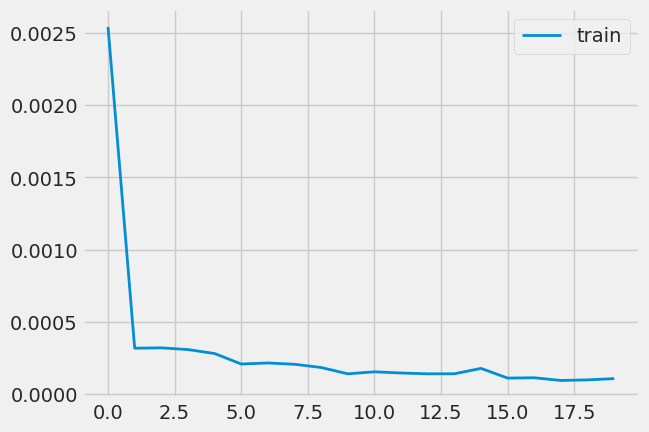

In [35]:
print(history15.history['loss'])
plt.plot(history15.history['loss'], label='train', linewidth=2.0)
# plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Prediction and RMSE Computation on Test Set for Model3

In [36]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data15 = scaled_data15[training_data_len15 - 60: , :]
# Create the data sets x_test and y_test
x_test15 = []
y_test15 = dataset15[training_data_len15:, :]
for i in range(60, len(test_data15)):
    x_test15.append(test_data15[i-60:i, 0])

# Convert the data to a numpy array
x_test15 = np.array(x_test15)

# Reshape the data
x_test15 = np.reshape(x_test15, (x_test15.shape[0], x_test15.shape[1], 1 ))

# Get the models predicted price values
predictions = model3.predict(x_test15)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test15) ** 2)))
rmse

6/6 [==============================] - 1s 4ms/step


2.3908673166929204

### Plot comparing the Actual Stock Closing Prices and Model3's Predictions on Test Set

<ipython-input-37-f4916a0f6211>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


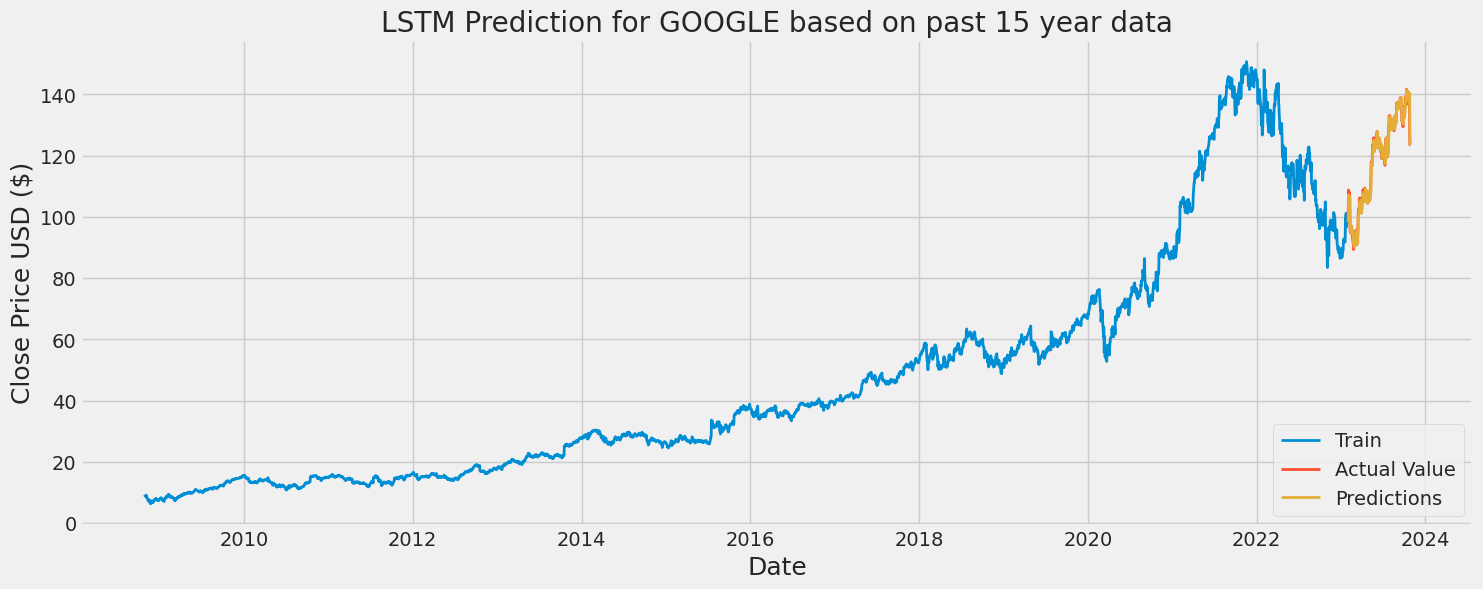

In [37]:
# Plot the data
train = data15[:training_data_len15]
valid = data15[training_data_len15:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction for GOOGLE based on past 15 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

# 5. Test Prediction of the LSTM Models

### Comparison of the three LSTM models (Model1, Model2 and Model3) on prediction of last 30 days' stock price prediction

In [38]:
# Get the stock quote
end = datetime.now()
test_df = pdr.get_data_yahoo('GOOG', start=datetime(end.year, end.month - 5 , end.day), end=end)


# Create a new dataframe with only the 'Close column
data = test_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = len(dataset)


scaled_data = scaler.fit_transform(dataset)


# Create the testing data set
test_data = scaled_data[training_data_len - 90: , :]
# Create the data sets x_test and y_test

x_test = []

y_actual = dataset[training_data_len-30:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions1 = model1.predict(x_test)
predictions1 = scaler.inverse_transform(predictions1)

# # Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_actual) ** 2)))

predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)

# # Get the root mean squared error (RMSE)
rmse2 = np.sqrt(np.mean(((predictions2 - y_actual) ** 2)))

predictions3 = model3.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# # Get the root mean squared error (RMSE)
rmse3 = np.sqrt(np.mean(((predictions3 - y_actual) ** 2)))

print("RMSE loss on the last 30 days predictions by model1", rmse1)
print("RMSE loss on the last 30 days predictions by model2", rmse2)
print("RMSE loss on the last 30 days predictions by model3", rmse3)


[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
RMSE loss on the last 30 days predictions by model1 2.9652659625468507
RMSE loss on the last 30 days predictions by model2 2.9506290363531336
RMSE loss on the last 30 days predictions by model3 3.0011173062609577


### Plot Comparing the Actual Closing Prices to the Models' Predictions for the last 30 days

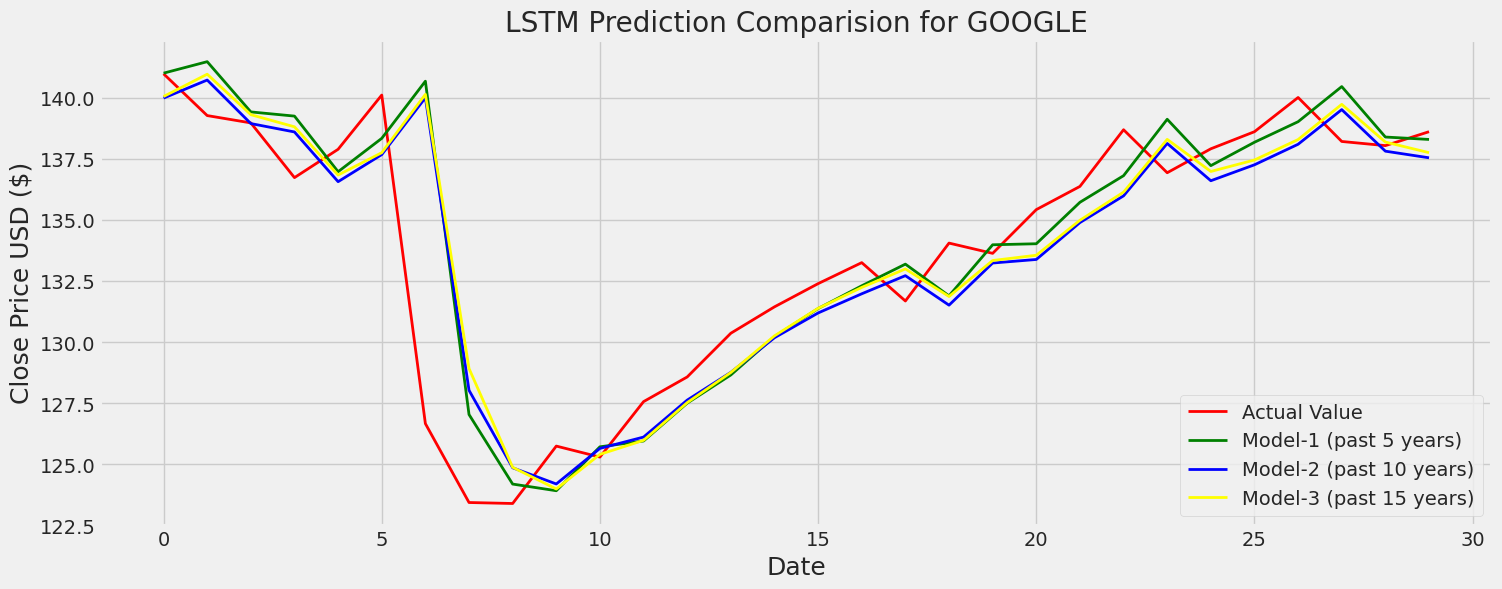

In [39]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prediction Comparision for GOOGLE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(y_actual, label = 'Actual price', color = 'red',  linewidth=2.0)
plt.plot(predictions1, label = 'Prediction based on past 5 years', color = 'green', linewidth=2.0)
plt.plot(predictions2, label = 'Prediction based on past 10 years', color = 'blue', linewidth=2.0)
plt.plot(predictions3, label = 'Prediction based on past 15 years', color = 'yellow', linewidth=2.0)

plt.legend(['Actual Value', 'Model-1 (past 5 years)', 'Model-2 (past 10 years)', 'Model-3 (past 15 years)'], loc='lower right')
plt.show()

# 6. Training of XGBOOST Models for Stock Price Prediction of GOOGLE


### Initialise the three XGBoost Models

In [40]:
from xgboost import XGBRegressor
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

# Model1 : trained on past 5 years data
original_shape1 = (x_train5.shape[0], x_train5.shape[1])
x_train5_xg = np.reshape(x_train5, original_shape1)
xgb_model1 = XGBRegressor(n_estimators=1000)
print(x_train5_xg.shape)
print(y_train5.shape)


# Model2 : trained on past 10 years data
original_shape2 = (x_train10.shape[0], x_train10.shape[1])
x_train10_xg = np.reshape(x_train10, original_shape2)
xgb_model2 = XGBRegressor(n_estimators=2000)
print(x_train10_xg.shape)
print(y_train10.shape)


# Model3 : trained on past 15 years data
original_shape3 = (x_train15.shape[0], x_train15.shape[1])
x_train15_xg = np.reshape(x_train15, original_shape3)
xgb_model3 = XGBRegressor(n_estimators=3000)
print(x_train15_xg.shape)
print(y_train15.shape)


(1136, 60)
(1136,)
(2333, 60)
(2333,)
(3528, 60)
(3528,)


### Train the 1st XGBoost Model (trained on past 5 years data):

In [41]:
history5_xg = xgb_model1.fit(x_train5_xg, y_train5, verbose=False)

### Prediction and RMSE Computation on Test Set for 1st XGBoost Model

In [42]:
original_shape = (x_test5.shape[0], x_test5.shape[1])
x_test5_xg = np.reshape(x_test5, original_shape)
predictions5_xg = xgb_model1.predict(x_test5_xg)

predictions5_xg = np.reshape(predictions5_xg, (predictions5_xg.shape[0], 1 ))
predictions5_xg = scaler.inverse_transform(predictions5_xg)


# Get the root mean squared error (RMSE)


print("Root Mean squared Error - RMSE for XGBOOST model 1: " + str(math.sqrt(mean_squared_error(y_test5, predictions5_xg))))

Root Mean squared Error - RMSE for XGBOOST model 1: 5.233260925522288


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 1 Predictions on Test Set

<ipython-input-43-e00b388c9c25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions5_xg


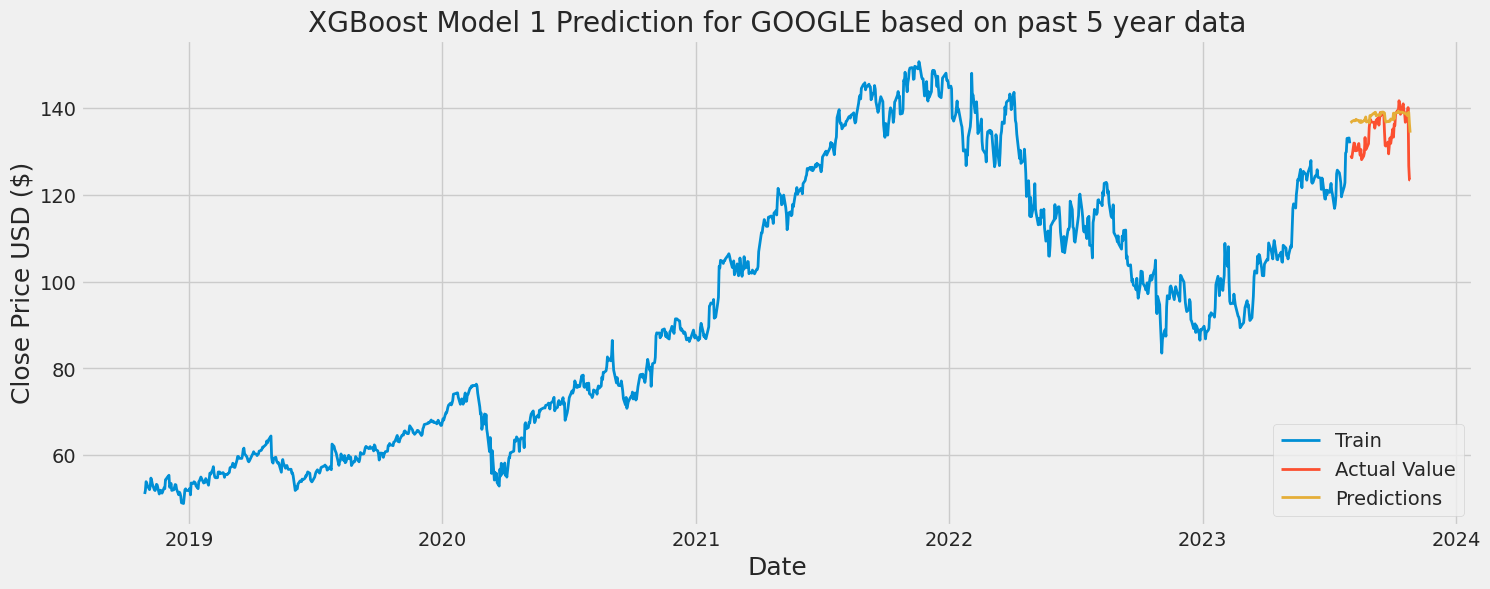

In [43]:
train = data5[:training_data_len5]
valid = data5[training_data_len5:]
valid['Predictions'] = predictions5_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 1 Prediction for GOOGLE based on past 5 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()


### Train the 2nd XGBoost Model (trained on past 10 years data):

In [44]:
history10_xg = xgb_model2.fit(x_train10_xg, y_train10, verbose=False)

### Prediction and RMSE Computation on Test Set for 2nd XGBoost Model

In [45]:
original_shape = (x_test10.shape[0], x_test10.shape[1])
x_test10_xg = np.reshape(x_test10, original_shape)
predictions10_xg = xgb_model2.predict(x_test10_xg)
predictions10_xg = np.reshape(predictions10_xg, (predictions10_xg.shape[0], 1 ))
predictions10_xg = scaler.inverse_transform(predictions10_xg)

print("Root Mean squared Error - RMSE for XGBOOST model 2: " + str(math.sqrt(mean_squared_error(y_test10, predictions10_xg))))

Root Mean squared Error - RMSE for XGBOOST model 2: 11.445164550422414


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 2 Predictions on Test Set

<ipython-input-46-f6e54bd80341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions10_xg


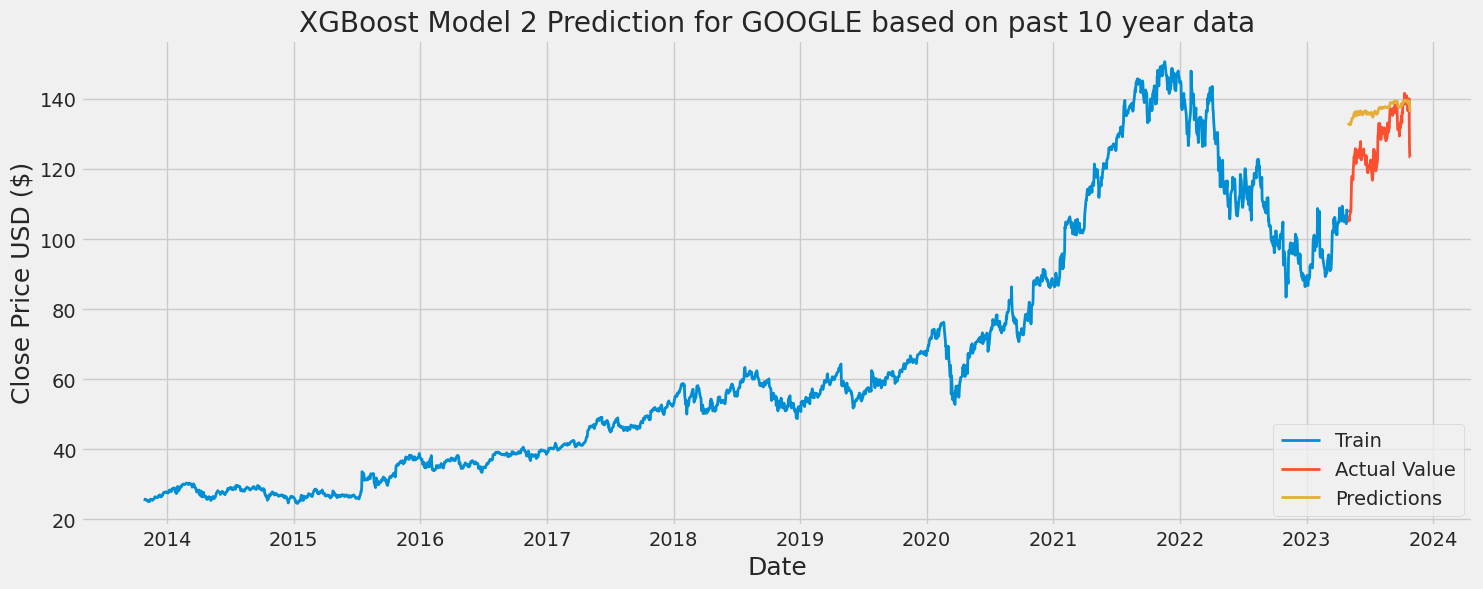

In [46]:
train = data10[:training_data_len10]
valid = data10[training_data_len10:]
valid['Predictions'] = predictions10_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 2 Prediction for GOOGLE based on past 10 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

### Train the 3rd XGBoost Model (trained on past 15 years data):

In [47]:
history15_xg = xgb_model3.fit(x_train15_xg, y_train15, verbose=False)

### Prediction and RMSE Computation on Test Set for 3rd XGBoost Model

In [48]:
original_shape = (x_test15.shape[0], x_test15.shape[1])
x_test15_xg = np.reshape(x_test15, original_shape)
predictions15_xg = xgb_model3.predict(x_test15_xg)
predictions15_xg = np.reshape(predictions15_xg, (predictions15_xg.shape[0], 1 ))
predictions15_xg = scaler.inverse_transform(predictions15_xg)

print("Root Mean squared Error - RMSE for XGBOOST model 3: " + str(math.sqrt(mean_squared_error(y_test15, predictions15_xg))))

Root Mean squared Error - RMSE for XGBOOST model 3: 21.429021313610907


### Plot comparing the Actual Stock Closing Prices and XGBoost Model 3 Predictions on Test Set

<ipython-input-49-7c66ac73d186>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions15_xg


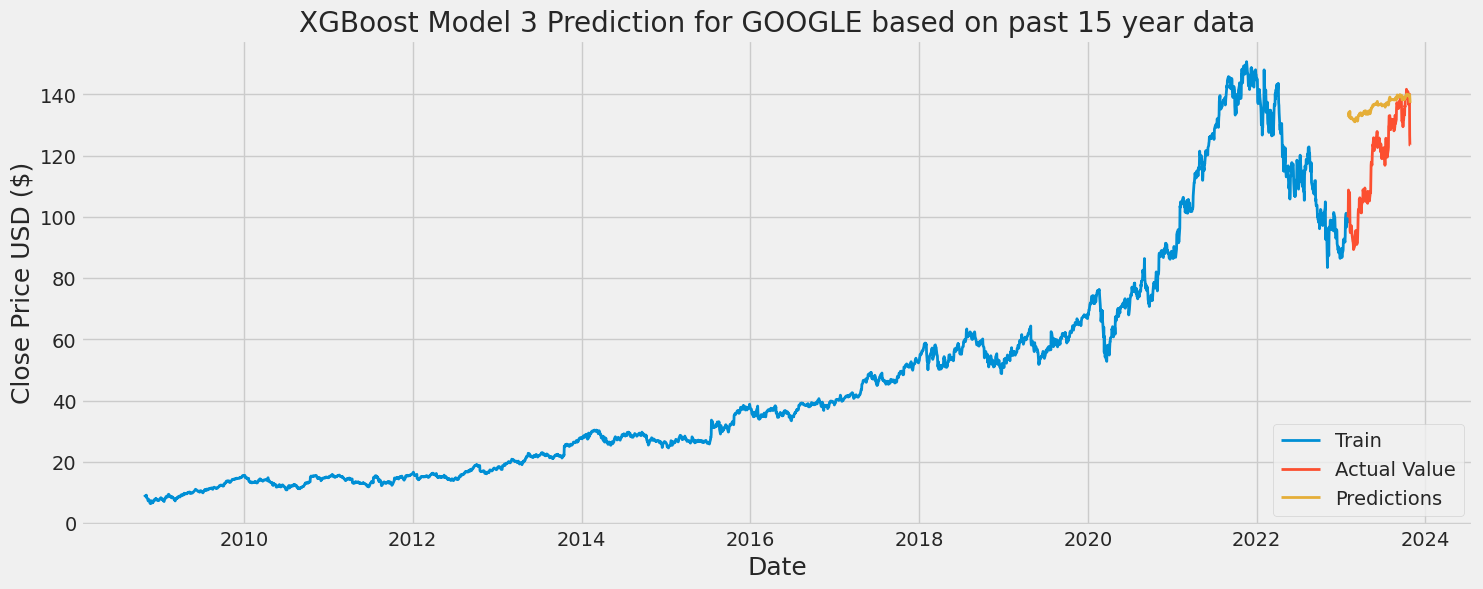

In [49]:
train = data15[:training_data_len15]
valid = data15[training_data_len15:]
valid['Predictions'] = predictions15_xg
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Model 3 Prediction for GOOGLE based on past 15 year data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Actual Value', 'Predictions'], loc='lower right')
plt.show()

# 7. Test Prediction of the XGBOOST Models

### Comparison of the three XGBOOST models (Model1, Model2 and Model3) on prediction of last 30 days' stock price

In [50]:
# Get the stock quote
end = datetime.now()
test_df = pdr.get_data_yahoo('GOOG', start=datetime(end.year, end.month - 5 , end.day), end=end)


# Create a new dataframe with only the 'Close column
data = test_df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = len(dataset)


scaled_data = scaler.fit_transform(dataset)


# Create the testing data set
test_data = scaled_data[training_data_len - 90: , :]
# Create the data sets x_test and y_test

x_test = []

y_actual = dataset[training_data_len-30:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the models predicted price values
predictions1 = xgb_model1.predict(x_test)

predictions1 = predictions1.reshape(-1,1)
predictions1 = scaler.inverse_transform(predictions1)

predictions2 = xgb_model2.predict(x_test)

predictions2 = predictions2.reshape(-1,1)
predictions2 = scaler.inverse_transform(predictions2)

predictions3 = xgb_model3.predict(x_test)

predictions3 = predictions3.reshape(-1,1)
predictions3 = scaler.inverse_transform(predictions3)

# # Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_actual) ** 2)))
rmse2 = np.sqrt(np.mean(((predictions2 - y_actual) ** 2)))
rmse3 = np.sqrt(np.mean(((predictions3 - y_actual) ** 2)))

print("RMSE loss on the last 30 days predictions by XGBoost model1: ", rmse1)
print("RMSE loss on the last 30 days predictions by XGBoost model2: ", rmse2)
print("RMSE loss on the last 30 days predictions by XGBoost model3: ", rmse3)

[*********************100%%**********************]  1 of 1 completed
RMSE loss on the last 30 days predictions by XGBoost model1:  2.9292629277314983
RMSE loss on the last 30 days predictions by XGBoost model2:  2.8898554135240806
RMSE loss on the last 30 days predictions by XGBoost model3:  2.8556943641911583


### Plot Comparing the Actual Closing Prices to the Models' Predictions for the last 30 days

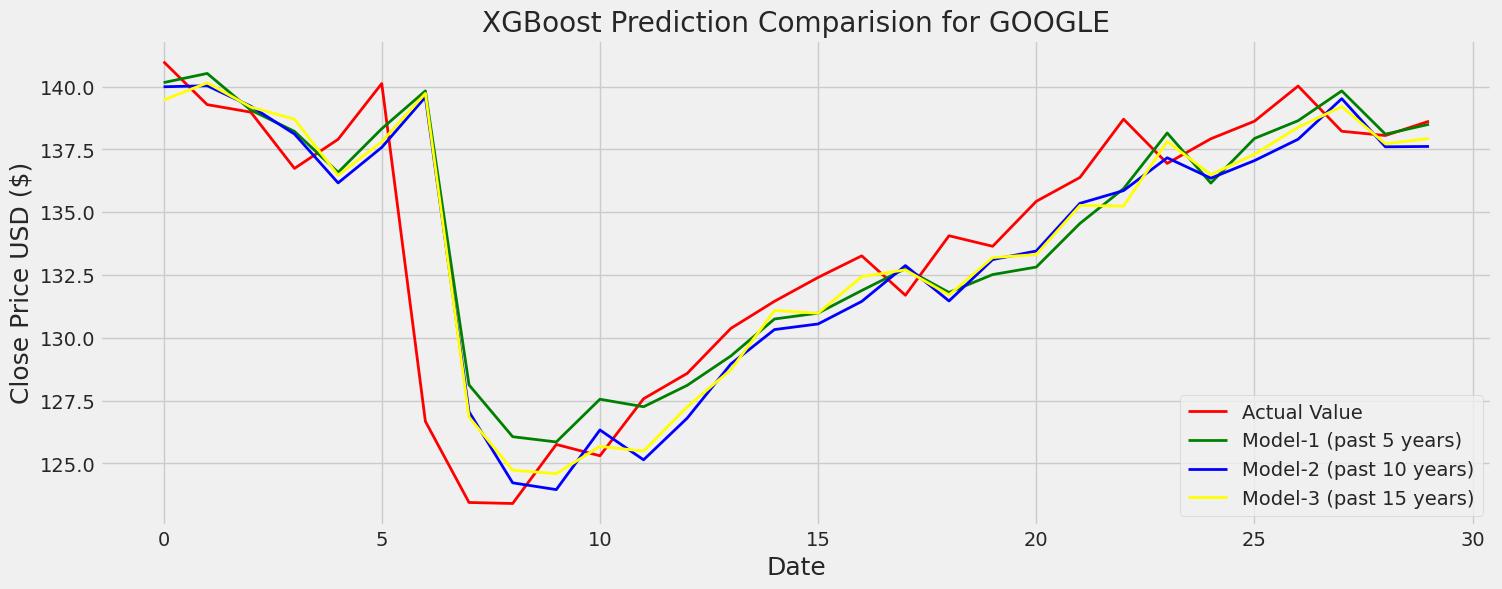

In [51]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('XGBoost Prediction Comparision for GOOGLE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(y_actual, label = 'Actual price', color = 'red',  linewidth=2.0)
plt.plot(predictions1, label = 'Prediction based on past 5 years', color = 'green', linewidth=2.0)
plt.plot(predictions2, label = 'Prediction based on past 10 years', color = 'blue', linewidth=2.0)
plt.plot(predictions3, label = 'Prediction based on past 15 years', color = 'yellow', linewidth=2.0)

plt.legend(['Actual Value', 'Model-1 (past 5 years)', 'Model-2 (past 10 years)', 'Model-3 (past 15 years)'], loc='lower right')
plt.show()